## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [43]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [44]:
train, test = keras.datasets.cifar10.load_data()

In [45]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [46]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [47]:
from keras.regularizers import l1, l2, l1_l2

def build_mlpl1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [63]:
def build_mlpl1_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [49]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [51]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlpl1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0717 21:56:50.602654  5444 deprecation.py:323] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 239us/step - loss: 198.7733 - acc: 0.2456 - val_loss: 41.0964 - val_acc: 0.2648
Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 19.0757 - acc: 0.1188 - val_loss: 7.2541 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 148us/step - loss: 4.0975 - acc: 0.0992 - val_loss: 2.6497 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.4866 - acc: 0.0984 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.4626 - acc: 0.0991 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.4626 - acc: 0.0989 - val_loss: 2.4629 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.4626 - acc: 0.0966 - val_loss: 2.46

50000/50000 [==============================] - 11s 221us/step - loss: 5.9964 - acc: 0.2753 - val_loss: 5.8055 - val_acc: 0.3399
Epoch 2/50
50000/50000 [==============================] - 11s 212us/step - loss: 5.7165 - acc: 0.3665 - val_loss: 5.6352 - val_acc: 0.3804
Epoch 3/50
50000/50000 [==============================] - 11s 210us/step - loss: 5.5718 - acc: 0.3951 - val_loss: 5.5046 - val_acc: 0.4056
Epoch 4/50
50000/50000 [==============================] - 10s 200us/step - loss: 5.4494 - acc: 0.4153 - val_loss: 5.3948 - val_acc: 0.4201
Epoch 5/50
50000/50000 [==============================] - 11s 211us/step - loss: 5.3420 - acc: 0.4281 - val_loss: 5.2926 - val_acc: 0.4345
Epoch 6/50
50000/50000 [==============================] - 11s 213us/step - loss: 5.2394 - acc: 0.4451 - val_loss: 5.2140 - val_acc: 0.4363
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 5.1456 - acc: 0.4538 - val_loss: 5.1152 - val_acc: 0.4534
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 7s 130us/step - loss: 1.8086 - acc: 0.3659 - val_loss: 1.7599 - val_acc: 0.3890
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7240 - acc: 0.3947 - val_loss: 1.6961 - val_acc: 0.4076
Epoch 4/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.6666 - acc: 0.4167 - val_loss: 1.6426 - val_acc: 0.4219
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6189 - acc: 0.4308 - val_loss: 1.5999 - val_acc: 0.4420
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5774 - acc: 0.4454 - val_loss: 1.5762 - val_acc: 0.4484
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5436 - acc: 0.4587 - val_loss: 1.5480 - val_acc: 0.4575
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5133 - acc: 0.4702 - val_loss: 1.5309 - val_acc: 0.4611
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 131us/step - loss: 1.7110 - acc: 0.4025 - val_loss: 1.6777 - val_acc: 0.4097
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6528 - acc: 0.4220 - val_loss: 1.6328 - val_acc: 0.4243
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6061 - acc: 0.4391 - val_loss: 1.5978 - val_acc: 0.4394
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5660 - acc: 0.4503 - val_loss: 1.5595 - val_acc: 0.4510
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5317 - acc: 0.4641 - val_loss: 1.5345 - val_acc: 0.4592
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5011 - acc: 0.4746 - val_loss: 1.5088 - val_acc: 0.4651
Epoch 9/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4737 - acc: 0.4829 - val_loss: 1.4927 - val_acc: 0.4738
Epoch 10/50
50000/50000 [====================

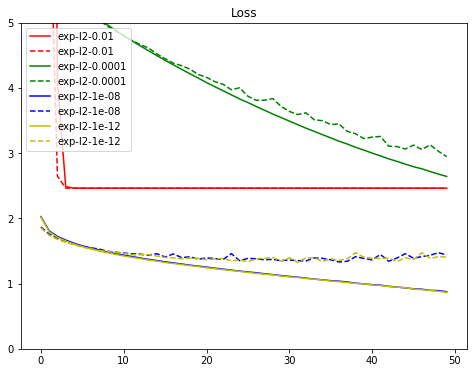

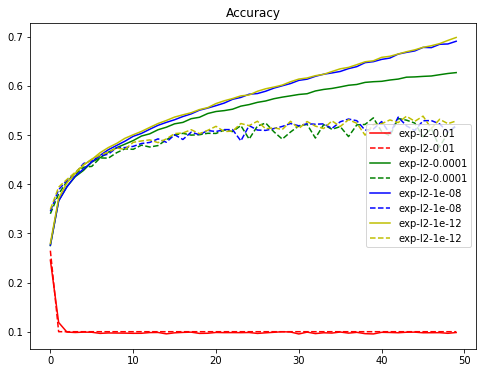

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [64]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model2 = build_mlpl1_l2(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model2.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model2.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model2.history.history["loss"]
    valid_loss = model2.history.history["val_loss"]
    train_acc = model2.history.history["acc"]
    valid_acc = model2.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 252us/step - loss: 18.8398 - acc: 0.2676 - val_loss: 17.3789 - val_acc: 0.3429
Epoch 2/50
50000/50000 [==============================] - 12s 242us/step - loss: 16.1586 - acc: 0.3592 - val_loss: 14.9872 - val_acc: 0.3827
Epoch 3/50
50000/50000 [==============================] - 12s 235us/step - loss: 13.9658 - acc: 0.3828 - val_loss: 12.9793 - val_acc: 0.3928
Epoch 4/50
50000/50000 [==============================] - 12s 239us/step - loss: 12.1128 - acc: 0.3990 - val_loss: 11.2774 - val_acc: 0.4054
Epoch 5/50
50000/50000 [==============================] - 12s 238us/step - loss: 10.5393 - acc: 0.4063 - val_loss: 9.8290 - val_acc: 0.4113
Epoch 6/50
50000/50000 [==============================] - 12s 239us/step - loss: 9.2015 - acc: 0.4135 - val_loss: 8.6015 - val_acc: 0.4167
Epoch 7/50
50000/50000 [==============================] - 12s 237us/step - loss: 8.0612 - acc: 0.4201 - val

50000/50000 [==============================] - 12s 231us/step - loss: 15.0806 - acc: 0.2755 - val_loss: 13.9478 - val_acc: 0.3397
Epoch 2/50
50000/50000 [==============================] - 11s 214us/step - loss: 13.0171 - acc: 0.3611 - val_loss: 12.1273 - val_acc: 0.3689
Epoch 3/50
50000/50000 [==============================] - 11s 216us/step - loss: 11.3471 - acc: 0.3817 - val_loss: 10.5949 - val_acc: 0.3934
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 9.9353 - acc: 0.3971 - val_loss: 9.2982 - val_acc: 0.3988
Epoch 5/50
50000/50000 [==============================] - 11s 212us/step - loss: 8.7356 - acc: 0.4075 - val_loss: 8.1930 - val_acc: 0.4135
Epoch 6/50
50000/50000 [==============================] - 11s 215us/step - loss: 7.7132 - acc: 0.4165 - val_loss: 7.2562 - val_acc: 0.4183
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 6.8417 - acc: 0.4231 - val_loss: 6.4489 - val_acc: 0.4187
Epoch 8/50
50000/50000 [========

50000/50000 [==============================] - 12s 245us/step - loss: 15.0959 - acc: 0.2633 - val_loss: 13.9622 - val_acc: 0.3429
Epoch 2/50
50000/50000 [==============================] - 11s 222us/step - loss: 13.0243 - acc: 0.3548 - val_loss: 12.1305 - val_acc: 0.3660
Epoch 3/50
50000/50000 [==============================] - 11s 213us/step - loss: 11.3448 - acc: 0.3810 - val_loss: 10.5922 - val_acc: 0.3921
Epoch 4/50
50000/50000 [==============================] - 11s 211us/step - loss: 9.9290 - acc: 0.3968 - val_loss: 9.2889 - val_acc: 0.4050
Epoch 5/50
50000/50000 [==============================] - 11s 214us/step - loss: 8.7281 - acc: 0.4072 - val_loss: 8.1882 - val_acc: 0.4135
Epoch 6/50
50000/50000 [==============================] - 11s 213us/step - loss: 7.7042 - acc: 0.4167 - val_loss: 7.2566 - val_acc: 0.4140
Epoch 7/50
50000/50000 [==============================] - 10s 210us/step - loss: 6.8325 - acc: 0.4211 - val_loss: 6.4409 - val_acc: 0.4263
Epoch 8/50
50000/50000 [========

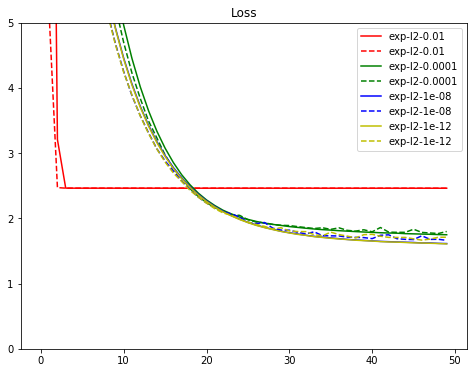

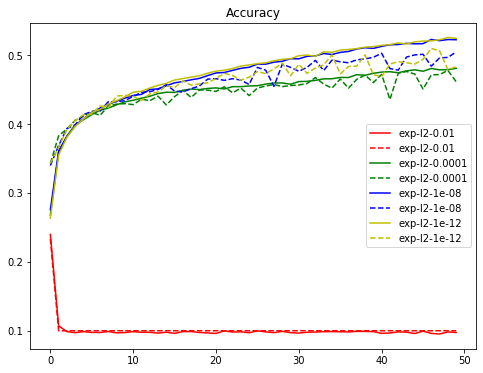

In [65]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()